## Importing necessary libraries and data

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Loading Dataset

In [262]:
df = pd.read_csv("used_phone_data.csv") # reading csv file
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


### Get General infromation about data

In [235]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


**There are 15 attributes, 11 out of 15 attributes are either integers or floats and other 4 are object type attributes, some of the attributes have null values.**

### Lets check for null values more clearly

In [236]:
df.isnull().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

**As it can be seen that attribute `main_camera_mp, selfie_camera_mp, int_memory, ram, battery, and weight` have null values, it will be dealt with later on**

### Get the description of the dataset

In [237]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3571.0,14.803892,5.153092,2.700,12.700,13.49,16.510,46.36
main_camera_mp,3391.0,9.400454,4.818396,0.080,5.000,8.00,13.000,48.00
selfie_camera_mp,3569.0,6.547352,6.879359,0.300,2.000,5.00,8.000,32.00
int_memory,3561.0,54.532607,84.696246,0.005,16.000,32.00,64.000,1024.00
ram,3561.0,4.056962,1.391844,0.030,4.000,4.00,4.000,16.00
battery,3565.0,3067.225666,1364.206665,80.000,2100.000,3000.00,4000.000,12000.00
weight,3564.0,179.424285,90.280856,23.000,140.000,159.00,184.000,950.00
release_year,3571.0,2015.964996,2.291784,2013.000,2014.000,2016.00,2018.000,2020.00
days_used,3571.0,675.391487,248.640972,91.000,536.000,690.00,872.000,1094.00
new_price,3571.0,237.389037,197.545581,9.130,120.130,189.80,291.935,2560.20


**As it can be seen that some of the values, are way larger then the rest, and it can lead to poor accuracy of the model. Attribute battery, have 75 percentile battery as 4000 MAH and then the max battery in the data is 12000 which way above the 75 percentile, This will have to be dealt with before training the model.**

## Exploratory Data Analysis (EDA)
- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Questions that are good to answer:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?
etc

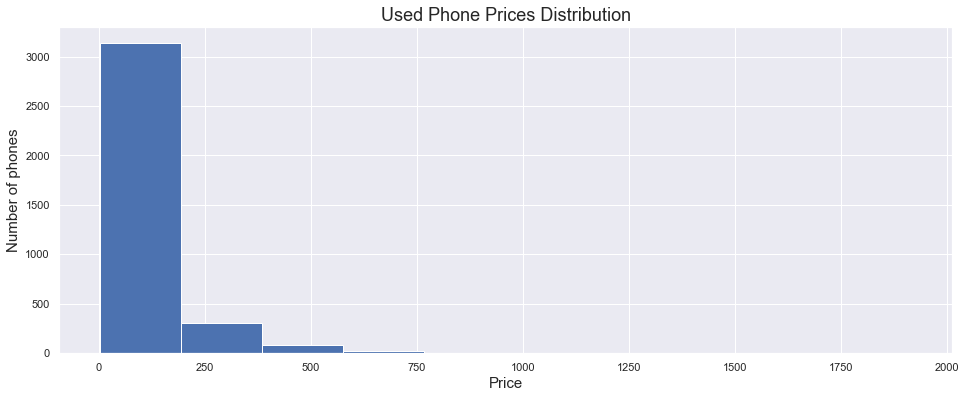

In [238]:
# checking the distribution of the phone prices
plt.figure(figsize=(16,6))  # figure size
plt.hist(df['used_price'])  # histogram of used_price
plt.xlabel("Price", fontsize=15) # axis label
plt.ylabel("Number of phones", fontsize=15) # yaxis label
plt.title("Used Phone Prices Distribution", fontsize=18) # title of figure
plt.show()

**It can be observed that most of the phone prices liest between 0-250, and few between 25-530 approximately.**

In [239]:

def labeled_barplot(data, feature):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()


    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature)

    for p in ax.patches:
        label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

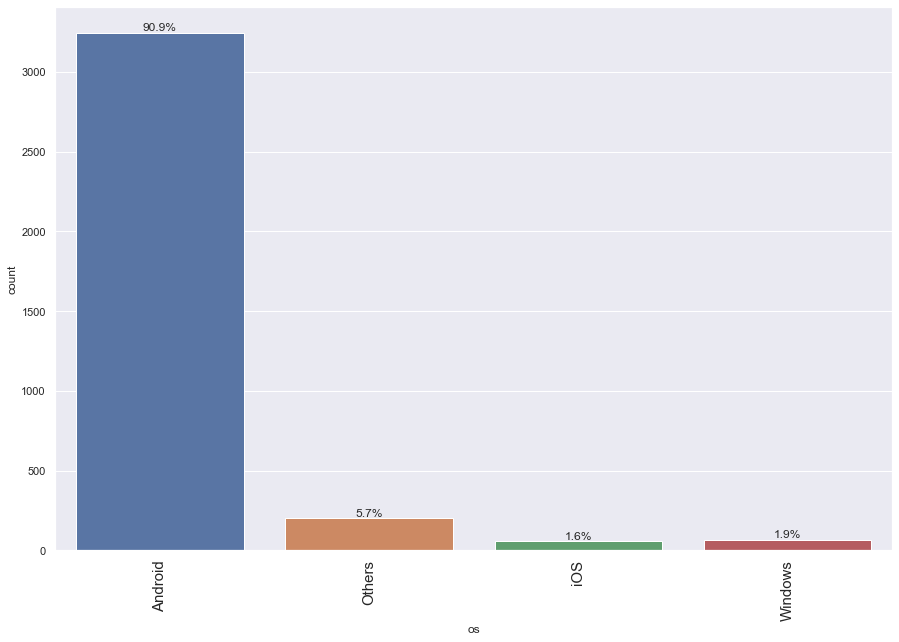

In [240]:
labeled_barplot(df, 'os')

**Android occupies almost 91% of the mobile market**

In [241]:
df.brand_name.unique()  # getting unique values in the column brand_name

array(['Honor', 'Others', 'HTC', 'Huawei', 'Infinix', 'Lava', 'Lenovo',
       'LG', 'Meizu', 'Micromax', 'Motorola', 'Nokia', 'OnePlus', 'Oppo',
       'Realme', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE', 'Apple', 'Asus',
       'Coolpad', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon', 'Gionee',
       'Google', 'Karbonn', 'Microsoft', 'Panasonic', 'Sony', 'Spice',
       'XOLO'], dtype=object)

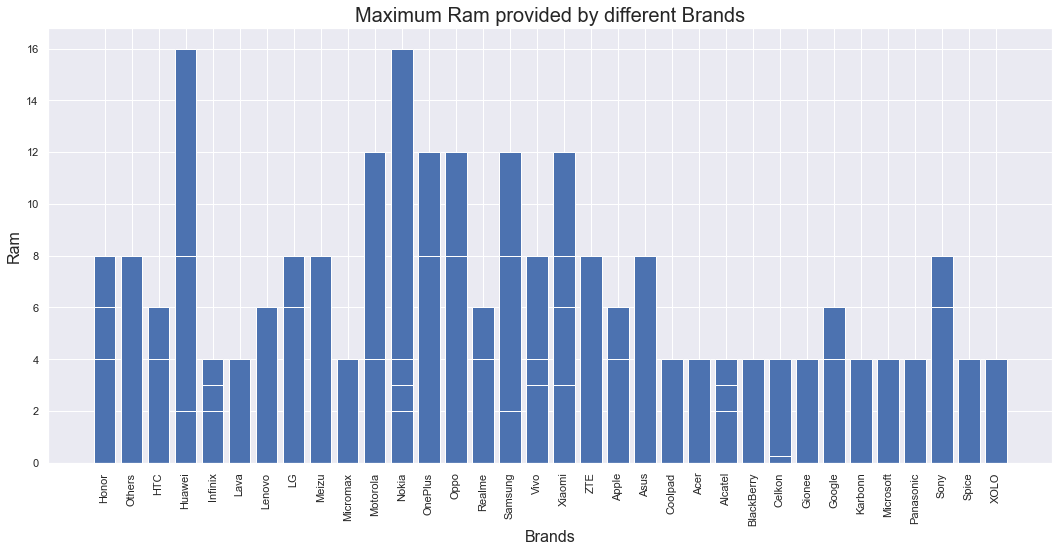

In [242]:
plt.figure(figsize=(18, 8))
plt.bar(df['brand_name'], df['ram'])
plt.xlabel("Brands", fontsize=16)
plt.ylabel("Ram", fontsize=16)
plt.xticks(rotation=90)
plt.title("Maximum Ram provided by different Brands", fontsize=20)
plt.show()

**Above Graph shows the maximun GB of Ram, that the brand provides. For example, If you are going to buy an acer phone you can expect no more then 4 GB of RAM at max.**

**The above chart doesn't convey much, lets look at the average ram the brand provides.**

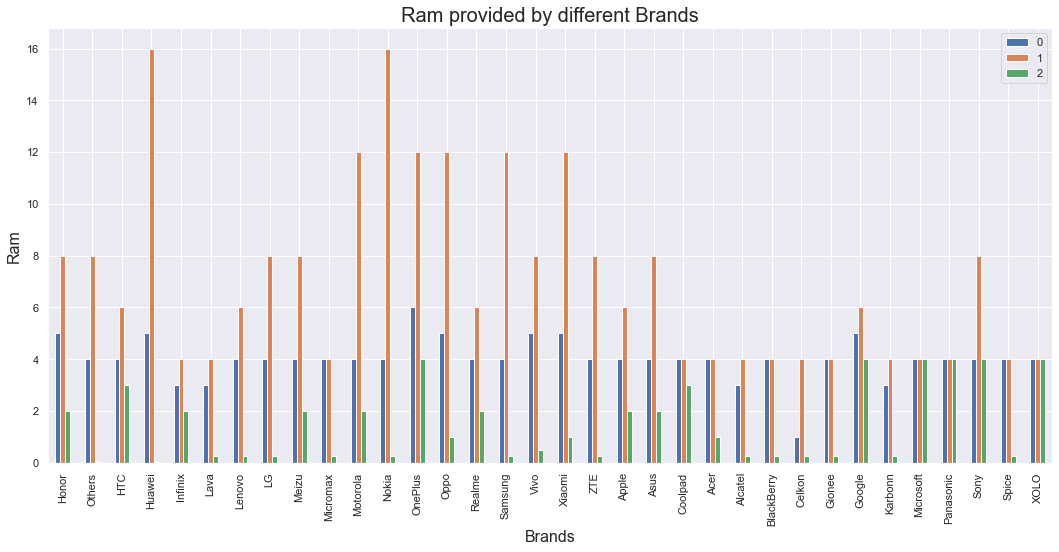

In [263]:
brands = df.brand_name.unique()  # geting all brands
average_ram = []
max_ram = []
min_ram = []
for brand in brands:
    average_ram.append(round(df[df['brand_name'] == brand]['ram'].mean()))  # appeding brands with mean ram
    max_ram.append(df[df['brand_name'] == brand]['ram'].max()) # appeding brands with max ram
    min_ram.append(df[df['brand_name'] == brand]['ram'].min()) # appeding brands with min ram
    


df_temp = pd.DataFrame(np.c_[average_ram, max_ram, min_ram], index=brands)
df_temp.plot.bar(figsize=(18, 8))


plt.xlabel("Brands", fontsize=16)
plt.ylabel("Ram", fontsize=16)
plt.xticks(rotation=90)
plt.title("Ram provided by different Brands", fontsize=20)
plt.show()

#### 0 - Average Ram 
#### 1 - Max Ram
#### 2 - Min Ram

**Now as the labels are clear, we can see that most companies on average provides around 4 GB of Ram in their mobile phones, and there are companies like `Lava` which provides minimum ram of 0.25 GB which is way below 1 GB and in today's era with big apps at minimum 2 GB should be required.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


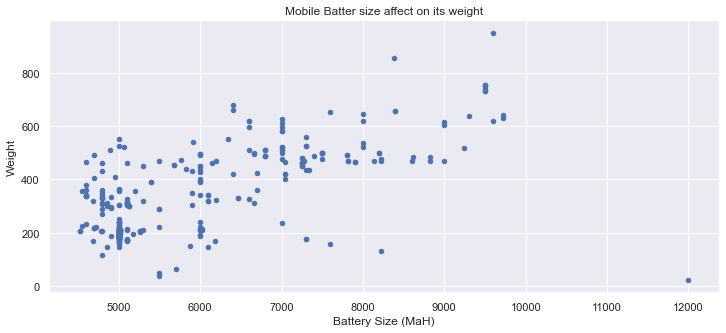

In [244]:
temp_df = df[df['battery']>4500]
temp_df.plot.scatter("battery", "weight", figsize=(12, 5))
plt.xlabel("Battery Size (MaH)")
plt.ylabel("Weight")
plt.title("Mobile Batter size affect on its weight")
plt.show()

**The graph shows some positive co relation between the battery and weight, though not too postive, E.g., the weight increases whenever the battery size increases , but in other cases as it can be seen even though the size increases the wieght either goes down or stays the same.**

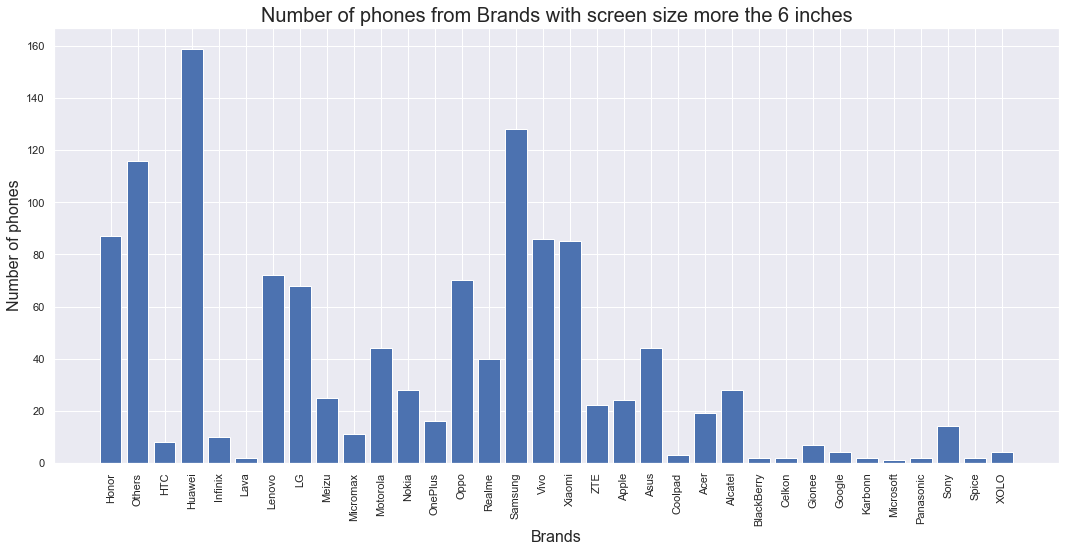

In [245]:
screens_greaterthan_6 = []

for brand in brands:
    screens_greaterthan_6.append(df[(df['brand_name'] == brand) & (df['screen_size'] > 15.24)]['screen_size'].count()) # counting number of phones with screen size > 15.24 cm of each brand

plt.figure(figsize=(18, 8))
plt.bar(brands, screens_greaterthan_6)
plt.xlabel("Brands", fontsize=16)
plt.ylabel("Number of phones", fontsize=16)
plt.xticks(rotation=90)
plt.title("Number of phones from Brands with screen size more the 6 inches", fontsize=20)
plt.show()

**From above graph `Huawei` has most phones with screen larger than 6 inches, then `samsung` and `Honor`, `Vivo`, `Xiaomi` comes at 3rd with large number of phones with screen greater than 6 inches.**

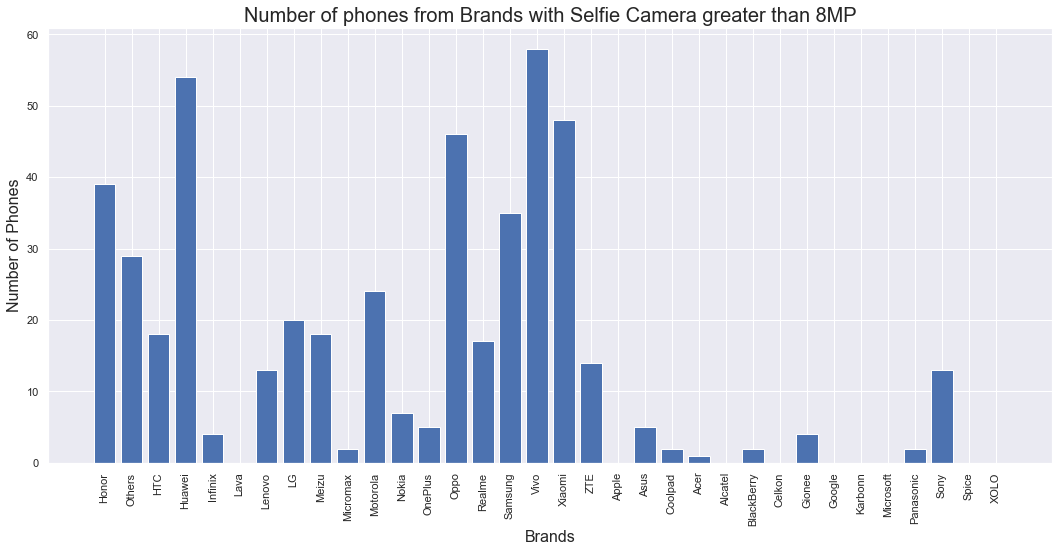

In [246]:
budget_phones = []
for brand in brands:
    # appeding phones for each brand with used price less than 250(250 affordable price according to graph above) and selfie camera greater than 8 MP
    budget_phones.append(df[(df['brand_name'] == brand) & (df['used_price'] < 250) & (df['selfie_camera_mp'] > 8)]['brand_name'].count())

    
plt.figure(figsize=(18, 8))
plt.bar(brands, budget_phones)
plt.xlabel("Brands", fontsize=16)
plt.ylabel("Number of Phones", fontsize=16)
plt.xticks(rotation=90)
plt.title("Number of phones from Brands with Selfie Camera greater than 8MP", fontsize=20)
plt.show()

**The graph above shows the number of phones each brand have, that has selfie camera greater then 8 MP.**

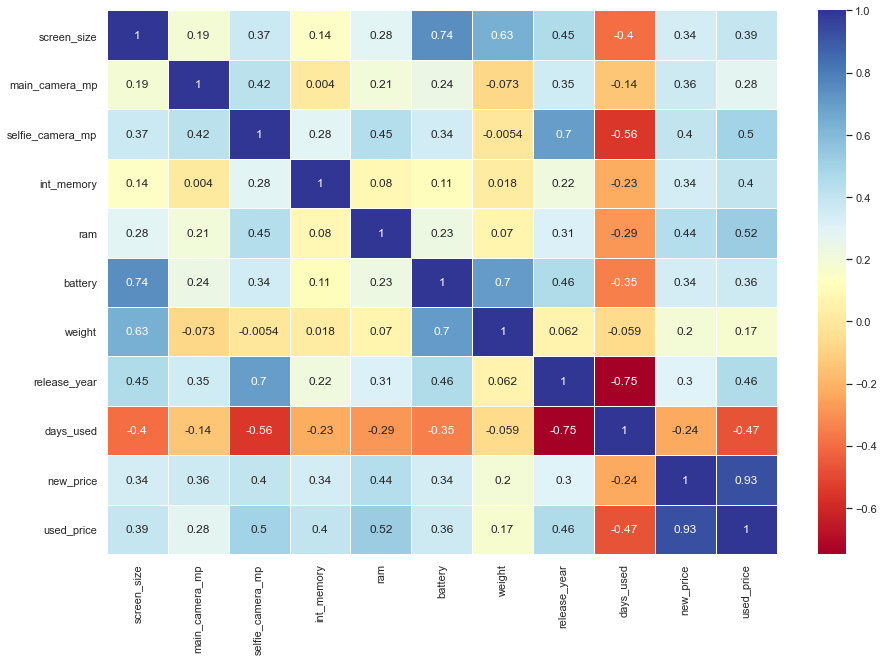

In [247]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.heatmap( df.corr(), annot=True, linewidths=0.5, cmap="RdYlBu")
plt.show()

**From above it can be seen that the most influence on used price attribute are `new_price`, `ram` and `selfie_camera`, these attributes have positive corelation with used_price, E.g., whenever the ram or new price increases the used_price will also increase, and vice versa. Similarly, some attributes have similiar but opposite affect, such as `days_used`, whenever `days_used` increases the `used_price` will decreases and vise versa.**

**Other attributes that affect target variable to some extents are all other remaining attributes except `weight`, although, it has positive co relation with the `used_price`, it has very low effect compared to other attributes.**

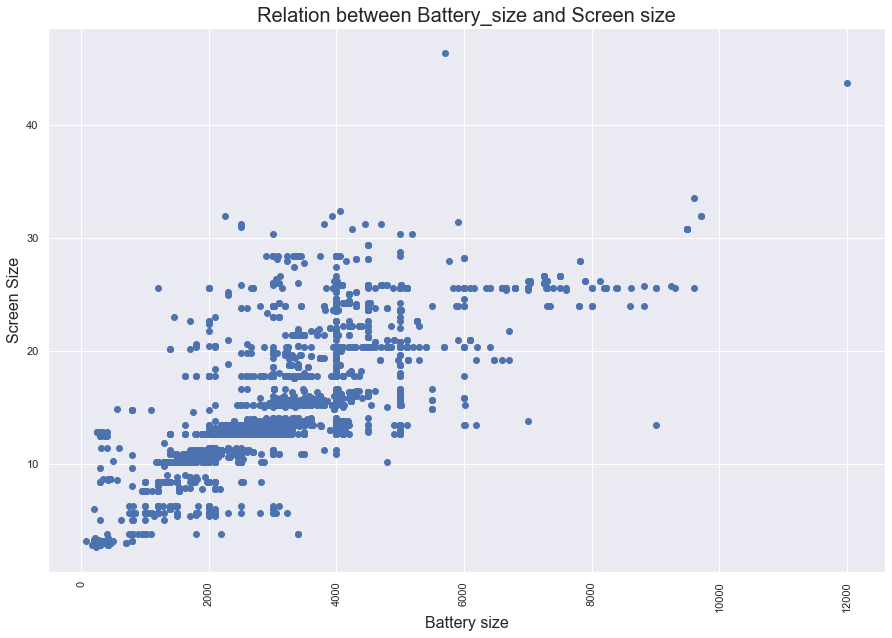

In [248]:
plt.scatter(df['battery'], df['screen_size'])
plt.xlabel("Battery size", fontsize=16)
plt.ylabel("Screen Size", fontsize=16)
plt.xticks(rotation=90)
plt.title("Relation between Battery_size and Screen size", fontsize=20)
plt.show()

**Battery size have positive relation with screen size, if battery size increases then screen will also increase and vice versa**

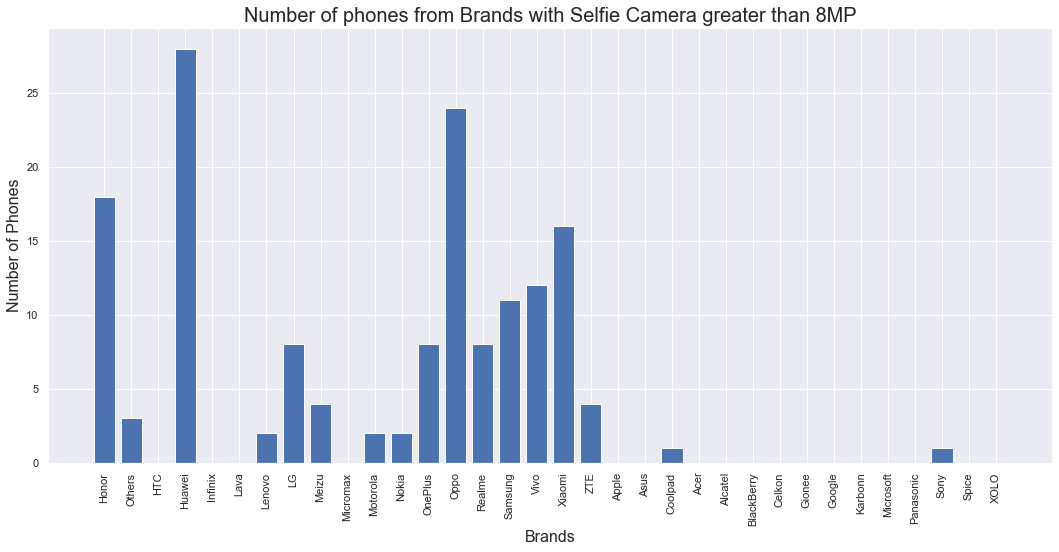

In [249]:
five_g_phones = []
for brand in brands:
    five_g_phones.append(df[(df['brand_name'] == brand) & (df['5g'] == 'yes')]['5g'].count())
    
plt.figure(figsize=(18, 8))
plt.bar(brands, five_g_phones)
plt.xlabel("Brands", fontsize=16)
plt.ylabel("Number of Phones", fontsize=16)
plt.xticks(rotation=90)
plt.title("Number of phones from Brands with Selfie Camera greater than 8MP", fontsize=20)
plt.show()

**From above graph it can be shown that almost half of the companies don't have even 1 5G phone, while some have more than 15 types of different phone with 5G**

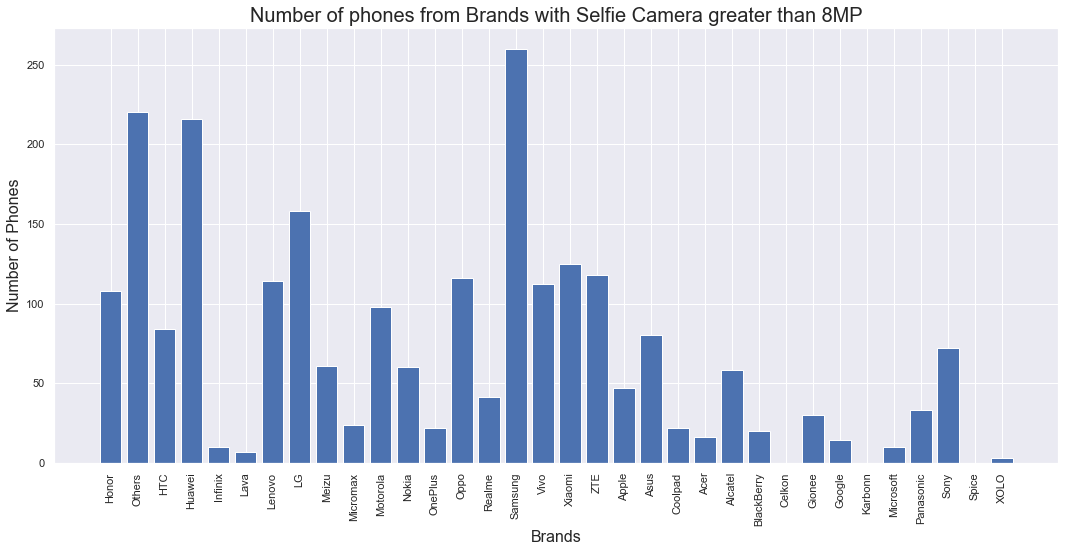

In [250]:
four_g_phones = []
for brand in brands:
    four_g_phones.append(df[(df['brand_name'] == brand) & (df['4g'] == 'yes')]['4g'].count())
    
plt.figure(figsize=(18, 8))
plt.bar(brands, four_g_phones)
plt.xlabel("Brands", fontsize=16)
plt.ylabel("Number of Phones", fontsize=16)
plt.xticks(rotation=90)
plt.title("Number of phones from Brands with Selfie Camera greater than 8MP", fontsize=20)
plt.show()

**It can be observed from above graph that almost all of the bran have 1 or more phones equiped with 4g, except `Celkon`, `Karbonn` and `spice` which don't have 4g phones.**

## Data Preprocessing
- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [251]:
df.isna().sum()

brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
main_camera_mp      180
selfie_camera_mp      2
int_memory           10
ram                  10
battery               6
weight                7
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

In [252]:
# Lets first deal with the missing values
# we would use mean value fill out the missing ones

values = {"main_camera_mp": df['main_camera_mp'].mean(), "selfie_camera_mp": df['selfie_camera_mp'].mean(), 
          "int_memory": df['int_memory'].mean(), "ram": df['ram'].mean(), 'battery': df['battery'].mean(),
         'weight': df['weight'].mean()}

df.fillna(value=values, inplace=True)  # fill all missing values with mean

In [253]:
# checking null values
df.isna().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

In [254]:
# change categorical data to numerical data for ML model
df['brand_name'] = df.brand_name.astype("category").cat.codes
df['os'] = df.os.astype("category").cat.codes
df['4g'] = df['4g'].astype("category").cat.codes
df['5g'] = df['5g'].astype("category").cat.codes

In [255]:
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,10,0,23.97,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,10,0,28.10,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,10,0,24.29,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,10,0,26.04,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,10,0,15.72,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


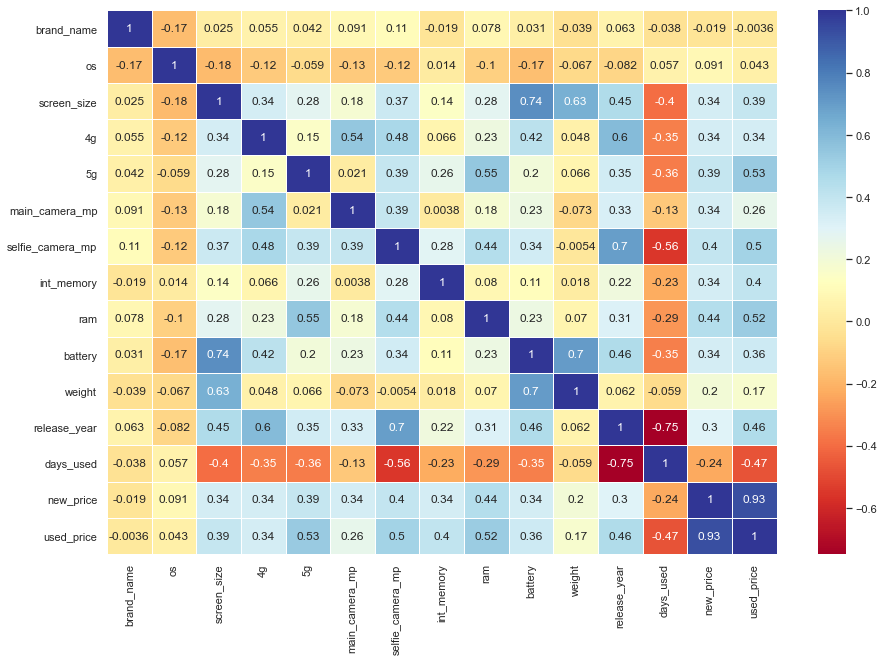

In [256]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.heatmap( df.corr(), annot=True, linewidths=0.5, cmap="RdYlBu")
plt.show()

**Now, as 4 new columns have been added, we can see that 4g and 5g have quiet high effect on the used_price, and the brand_name and os have nearly 0 effect on the target variable so we can get rid of those attributes**

**To satisfy Linear Regression assumption, that no independent variable is too corealated, we will remove those variables that are too co related or of no relation to the used_price**

In [257]:
df.drop(["brand_name", "os", "days_used", "battery", "weight"], axis=1, inplace=True)
df

,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,release_year,new_price,used_price
0,23.97,1,0,13.000000,5.0,64.0,3.0,2020,111.6200,86.96
1,28.10,1,1,13.000000,16.0,128.0,8.0,2020,249.3900,161.49
2,24.29,1,1,13.000000,8.0,128.0,8.0,2020,359.4700,268.55
3,26.04,1,1,13.000000,8.0,64.0,6.0,2020,278.9300,180.23
4,15.72,1,0,13.000000,8.0,64.0,3.0,2020,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...
3566,15.88,1,0,9.400454,8.0,64.0,6.0,2019,654.5000,490.96
3567,15.24,1,0,13.000000,8.0,128.0,8.0,2018,518.8145,259.30
3568,18.73,1,0,13.000000,5.0,32.0,3.0,2020,92.6500,69.81
3569,18.73,1,0,13.000000,5.0,32.0,2.0,2020,101.9150,76.07


In [258]:
X = df.drop('used_price', axis=1).values
y = df['used_price'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


# lets make data normal
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Building a Linear Regression model

In [259]:
lr_model = LR()
lr_model.fit(X_train, y_train)

LinearRegression()

### Model performance evaluation

In [260]:
y_pred = lr_model.predict(X_test)
r2_score(y_test, y_pred)

0.9265605370911161

**Having a R2 score of 0.94 is too good, the closer the R2 score to the 1 the better the model is performing, and in our case it is performing quite good with score of 0.94**

### Checking Linear Regression Assumptions
- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

**The R2 score dropped by 0.02 while satisfying all linear Regression assumptions.**
- The relationship of remaining attributes have linear corelation with target variable
- The data has been scaled to have 0 mean and 1 variance to set the data to normal distribution
- All the Multicollinearity between independent variables have been removed (by removing all those attributes)
All above assumtpions are checked before training the Linear Regression model

### Actionable Insights and Recommendations

**From above analysis, we saw that many factors are affecting used_price of a mobile phone, following are some Recommendation on which phone to choose to recell**.
- One of the main reason people buy used_phone is because they get high end phones with less money, and that is the driving factor, though, if the used phone costs the same as new phones , people might avoid buing it so the company has to keep any eye on the price of the phone. How the price of the phone is affected, is given below.
- Both rear and front camera have huge impact on the phone price, the startup should focus on reselling a phone with rear-camera being the great one and the front camera somewhat normal, that way the price will be lower, and people might not complain, because many people prefer the back rather the the front camera.
- 5g also increase the price of the phones, though, 5g phones are good but right now the startup should avoid such phones, as there are yet less development on the 5g network and it will be long before the 5g actually worth it in the phone, most people are getting by fine with 4g phones, so instead of 5g, 4g phones should be bought to make the phones most desireable.
- The last thing, I think will bring down the price of the phone is RAM, althoug RAM is essential but more than 4 GB RAM in a phone will not much effect the performance unless heavy games and apps are the desired of the person that is perchasing the phone, there are not much who buys phone for such heavy tasks, and I thing the company should avoid buying phones with more than 4 GB RAM, though, if they want they should then only go for phones with 6GB of RAM and no more, 6GB is more than enough.